#BASIC IMPORTS

In [ ]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import seaborn as sns
sns.set(style = 'whitegrid')

import datetime

# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 20,10

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

In [ ]:
Stock = 'Parag Milk Foods' #@param ["TATA GLOBAL", "UJJVAIN", "Mahanagar Gas", "Dr Lal Path Labs", "Dilip Buildcon", "Max India", "Parag Milk Foods"]

if Stock == 'TATA GLOBAL':
  url = 'https://raw.githubusercontent.com/akzhat/StockPricePrediction/main/NSE-TATAGLOBAL11.csv';
elif Stock == 'UJJVAIN':
  url = 'https://raw.githubusercontent.com/akzhat/StockPricePrediction/main/test_stock.csv';
elif Stock == 'Mahanagar Gas':
  url = 'https://raw.githubusercontent.com/akzhat/StockPricePrediction/main/MahanagarGas.csv';
elif Stock == 'Dr Lal Path Labs':
  url = 'https://raw.githubusercontent.com/akzhat/StockPricePrediction/main/DrLalPathLabs.csv';
elif Stock == "Dilip Buildcon":
  url = 'https://raw.githubusercontent.com/akzhat/StockPricePrediction/main/DilipBuildcon.csv';
elif Stock == "Max India":
  url = 'https://raw.githubusercontent.com/akzhat/StockPricePrediction/main/MaxIndia.csv';
elif Stock == "Parag Milk Foods":
  url = 'https://raw.githubusercontent.com/akzhat/StockPricePrediction/main/ParagMilkFoods.csv';

In [ ]:
df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,29-06-2021,139.60,140.35,137.55,138.10,139.02,90850,1650,12629991,29565.0,32.54,2.80,-1.50
1,28-06-2021,137.00,143.90,135.45,137.75,139.18,156175,2974,21736650,49805.0,31.89,8.45,0.75
2,25-06-2021,138.75,138.85,134.60,135.90,136.24,31222,895,4253797,10706.0,34.29,4.25,-2.85
3,24-06-2021,138.60,140.85,130.00,137.55,136.77,57122,1086,7812338,29555.0,51.74,10.85,-1.05
4,23-06-2021,138.35,140.00,137.40,137.60,138.32,32389,668,4480144,17021.0,52.55,2.60,-0.75


54


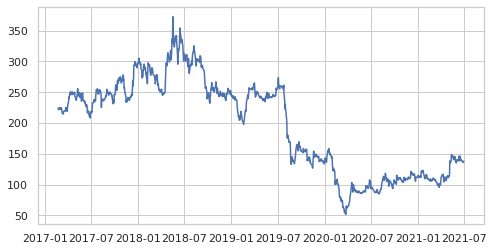

In [ ]:
df['Date'] = pd.to_datetime(df.Date, format='%d-%m-%Y')
df.index = df['Date']

MID = int(0.95*len(df))
print(len(df)-MID)

plt.figure(figsize = (8,4))
plt.plot(df['Close'], label = 'CLOSE PRICE HISTORY')

In [ ]:
# Candlestick patterns are used to predict the future direction of price movement
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])
fig.show()

In [ ]:
#Each candle represents entire OHLC information

w_start=100
w_size=20
new_df=df[w_start:w_start+w_size]
fig = go.Figure(data=[go.Candlestick(x=new_df.index,
                                     open=new_df['Open'],
                                     high=new_df['High'],
                                     low=new_df['Low'],
                                     close=new_df['Close'])])
fig.show()

In [ ]:
#MACD Strategy

exp1 = df.Close.ewm(span=12, adjust=False).mean()
exp2 = df.Close.ewm(span=26, adjust=False).mean()

macd = exp1-exp2
signal = macd.ewm(span=9, adjust=False).mean()

In [ ]:
# Simulate trading
# Start with 100k in money and no positions
money = 10000
countS = 0

df['Signal'] = None
for i in range(len(df)):
    if macd[i] > signal[i]:
        if macd[i-1] < signal[i-1]:
            money -= df.Close[i]
            countS += 1
            df.Signal[i] = 1
            print('Buy %s %s'%(money, countS))
    elif macd[i] < signal[i]:
        if macd[i-1] > signal[i-1]:
            money += df.Close[i]
            countS -= 1
            df.Signal[i] = -1
            print('Sell %s %s'%(money, countS))

print ("Final Portfolio Value :", money + df.Close[-1]*(countS))

Buy 9860.8 1
Sell 9999.55 0
Buy 9854.0 1
Sell 9989.45 0
Buy 9872.6 1
Sell 9974.45 0
Buy 9873.85 1
Sell 9985.6 0
Buy 9868.1 1
Sell 9978.9 0
Buy 9867.05 1
Sell 9970.65 0
Buy 9862.1 1
Sell 9962.7 0
Buy 9858.85 1
Sell 9963.85 0
Buy 9876.2 1
Sell 9971.550000000001 0
Buy 9882.35 1
Sell 9960.85 0
Buy 9899.9 1
Sell 10052.9 0
Buy 9907.699999999999 1
Sell 10054.749999999998 0
Buy 9904.249999999998 1
Sell 10030.999999999998 0
Buy 9885.849999999999 1
Sell 10040.199999999999 0
Buy 9878.05 1
Sell 10033.65 0
Buy 9872.65 1
Sell 10132.25 0
Buy 9882.35 1
Sell 10123.300000000001 0
Buy 9879.750000000002 1
Sell 10135.200000000003 0
Buy 9918.500000000002 1
Sell 10168.650000000001 0
Buy 9917.050000000001 1
Sell 10161.400000000001 0
Buy 9910.550000000001 1
Sell 10163.95 0
Buy 9898.45 1
Sell 10151.650000000001 0
Buy 9898.95 1
Sell 10200.800000000001 0
Buy 9875.6 1
Sell 10189.15 0
Buy 9882.9 1
Sell 10199.0 0
Buy 9857.8 1
Sell 10181.75 0
Buy 9830.9 1
Sell 10138.25 0
Buy 9883.55 1
Sell 10159.05 0
Buy 9871.5999999

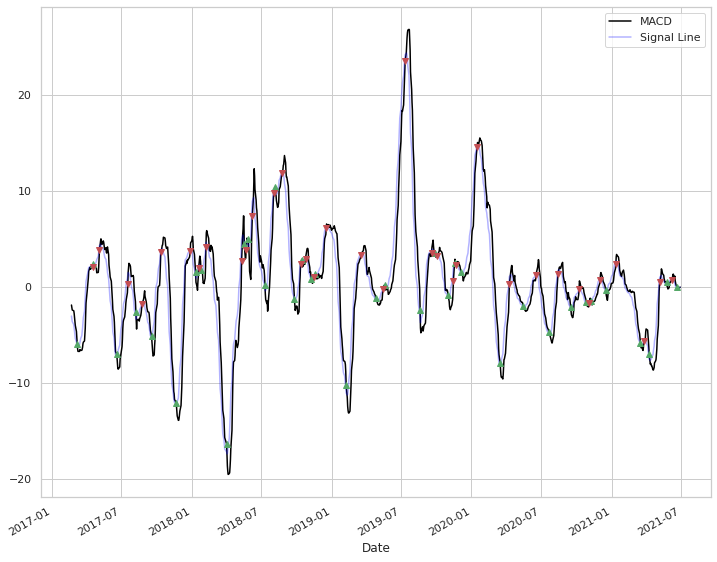

In [ ]:
plt.figure(figsize=(12,10))
macd.plot(color = {"black"}, label = "MACD", legend = "MACD")
signal.plot(color = {"blue"}, label = "Signal Line", alpha = 0.3, legend = "Signal")
macd.where(df.Signal == 1).plot(marker = '^', color = 'g', label = "Security Oversold")
macd.where(df.Signal == -1).plot(marker = 'v', color = 'r', label = "Security Overbought")

# CALCULATING SOME TECHNICAL INDICATORS

CALCULATING MOVING AVERAGES

In [ ]:
data = df.sort_index(ascending=True, axis=0)
#print(data)
new_data = pd.DataFrame(index=range(len(df)), columns=['Date', 'Close'])

for i in range(len(data)):
  new_data['Date'][i] = data['Date'][i]
  new_data['Close'][i] = data['Close'][i]

curr = new_data['Close'][len(new_data)-1]
print(new_data)
fiveday = new_data['Close'][len(new_data)-5:].sum()/5
tenday = new_data['Close'][len(new_data)-10:].sum()/10
twentyday = new_data['Close'][len(new_data)-20:].sum()/20
fiftyday = new_data['Close'][len(new_data)-50:].sum()/50
hundredday = new_data['Close'][len(new_data)-100:].sum()/100
twohday = new_data['Close'][len(new_data)-200:].sum()/200

SMA = [fiveday, tenday, twentyday, fiftyday, hundredday, twohday]
period = ['5 Days MA', '10 Days MA', '20 Days MA', '50 Days MA','100 Days MA', '200 Days MA']
def c(val1, val2):
  if val1 > val2:
    return 'Bearish'
  elif val1 == val2:
    return 'Neutral'
  else:
    return 'Bullish'
indication = [c(fiveday,curr), c(tenday,curr), c(twentyday,curr), c(fiftyday,curr), c(hundredday,curr), c(twohday,curr)]

dh = pd.DataFrame()
dh['Indicator'] = period
dh['Value'] = SMA
dh['Indication'] = indication

                     Date   Close
0     2017-02-21 00:00:00   223.9
1     2017-02-22 00:00:00   223.8
2     2017-02-23 00:00:00  221.55
3     2017-02-27 00:00:00  223.45
4     2017-02-28 00:00:00   224.6
...                   ...     ...
1072  2021-06-23 00:00:00   137.6
1073  2021-06-24 00:00:00  137.55
1074  2021-06-25 00:00:00   135.9
1075  2021-06-28 00:00:00  137.75
1076  2021-06-29 00:00:00   138.1

[1077 rows x 2 columns]


RSI CALCUATION

In [ ]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(len(df)), columns=['Date', 'Close'])

for i in range(len(data)):
  new_data['Date'][i] = data['Date'][i]
  new_data['Close'][i] = data['Close'][i]

change = [0]
for i in range(1,len(new_data)):
  change.append(new_data['Close'][i]-new_data['Close'][i-1])

def k(x):
  if x>0:
    return x
  else:
    return 0

def l(x):
  if x<0:
    return -x
  else:
    return 0

new_data['Change'] = change
gain = new_data['Change'].apply(lambda x: k(x))
loss = new_data['Change'].apply(lambda x: l(x))

new_data['Gain'] = gain
new_data['Loss'] = loss

avg_gain = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
avg_loss = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(14, len(new_data)):
  avg_gain.append((new_data['Gain'][i-14:i-1].sum())/14)
  avg_loss.append((new_data['Loss'][i-14:i-1].sum())/14)

new_data['Avg Gain'] = avg_gain
new_data['Avg Loss'] = avg_loss

new_data['RS'] = new_data['Avg Gain']/new_data['Avg Loss']
new_data['RSI'] = 100-(100/(1 + new_data['RS']))

def f(x):
  if x>=70:
    return "Overbought"
  elif x<=30:
    return "Oversold"
  else:
    return "Neutral"

ind = f(new_data['RSI'][len(new_data)-1])
#dh.append("Indicator":["RSI(14)"], "Value":[new_data['RSI'][len(new_data)-1]], "Indication":[ind])
dh.loc[len(dh.index)] = ['RSI(14)', new_data['RSI'][len(new_data)-1], ind]
dh


,Indicator,Value,Indication
0,5 Days MA,137.380000,Bullish
1,10 Days MA,138.870000,Bearish
2,20 Days MA,139.987500,Bearish
3,50 Days MA,134.240000,Bullish
4,100 Days MA,120.871500,Bullish
5,200 Days MA,115.476250,Bullish
6,RSI(14),43.001443,Neutral


#PREDICTING STOCK PRICE USING VARIOUS METHODS

1. AVERAGES METHOD


RMSE::
30.53216039003222


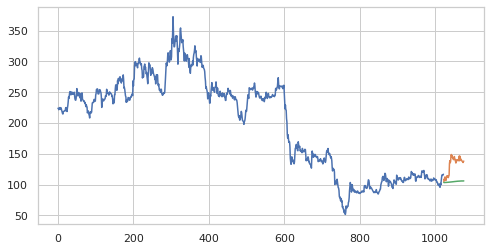

In [ ]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(len(df)), columns=['Date', 'Close'])

for i in range(len(data)):
  new_data['Date'][i] = data['Date'][i]
  new_data['Close'][i] = data['Close'][i]

train = new_data[:MID]
valid = new_data[MID:]

#PLOTTING MOVING AVERAGES
# curr = 0
# mov_avg = []
# mov_avg2 = []
# mov_avg.extend(new_data['Close'][:247])
# mov_avg2.extend(new_data['Close'][:248])
# for i in range(248, len(new_data)):
#   curr = new_data['Close'][i]
#   mov_avg2.append(mov_avg2[(len(mov_avg2)-1)] - (new_data['Close'][i-248]-new_data['Close'][i])/248 )
#   mov_avg.append((new_data['Close'][i-247:i].sum())/248)
# plt.figure(figsize = (8,4))
# plt.plot(new_data['Close'])
# plt.plot(mov_avg)
# plt.plot(mov_avg2)
# plt.show()

days = 248

preds = []
for i in range(0, valid.shape[0]):
  a = train['Close'][len(train)-days+i:].sum() + sum(preds)
  b = a/days
  preds.append(b)

#RMS
rms = np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds), 2)))
print('\nRMSE::')
print(rms)

#PLOT
plt.figure(figsize = (8,4))
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.show()

2. LINEAR REGRESSION

In [ ]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab


RMSE::
32.236626262136184


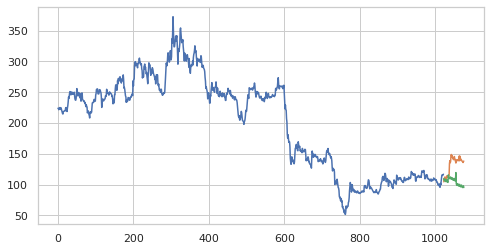

In [ ]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(len(df)), columns=['Date', 'Close'])

for i in range(len(data)):
  new_data['Date'][i] = data['Date'][i]
  new_data['Close'][i] = data['Close'][i]

from fastai.torch_basics import *
from fastai.data.all import *

def make_date(df, date_field):
    "Make sure `df[date_field]` is of the right date type."
    field_dtype = df[date_field].dtype
    if isinstance(field_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        field_dtype = np.datetime64
    if not np.issubdtype(field_dtype, np.datetime64):
        df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)

def add_datepart(df, field_name, prefix=None, drop=True, time=False):
    "Helper function that adds columns relevant to a date in the column `field_name` of `df`."
    make_date(df, field_name)
    field = df[field_name]
    prefix = ifnone(prefix, re.sub('[Dd]ate$', '', field_name))
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    week = field.dt.isocalendar().week.astype(field.dt.day.dtype) if hasattr(field.dt, 'isocalendar') else field.dt.week
    for n in attr: df[prefix + n] = getattr(field.dt, n.lower()) if n != 'Week' else week
    mask = ~field.isna()
    df[prefix + 'Elapsed'] = np.where(mask,field.values.astype(np.int64) // 10 ** 9,np.nan)
    if drop: df.drop(field_name, axis=1, inplace=True)
    return df

add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

#F1
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

train = new_data[:MID]
valid = new_data[MID:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

preds=model.predict(x_valid)

#RMS
rms = np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)), 2)))
print('\nRMSE::')
print(rms)

#PLOT
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[MID:].index
train.index = new_data[:MID].index

plt.figure(figsize = (8,4))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.show()

3. KNN Algo on same dataset


RMSE::
118.77665441600575


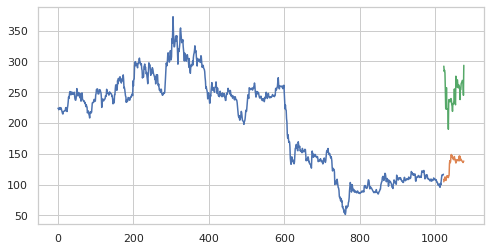

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

model.fit(x_train,y_train)
preds = model.predict(x_valid)

#RMS
rms = np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)), 2)))
print('\nRMSE::')
print(rms)

#PLOT
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[MID:].index
train.index = new_data[:MID].index

plt.figure(figsize = (8,4))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.show()

4. ARIMA

In [ ]:
!pip install pmdarima

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=5.01 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6944.408, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6659.169, Time=0.53 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.35 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6943.849, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6526.566, Time=1.11 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=12.22 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.26 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=6536.551, Time=0.84 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=6525.510, Time=1.82 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=6660.082, Time=0.64 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=14.62 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=7.03 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=6527.463, Time=1.51 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=6527

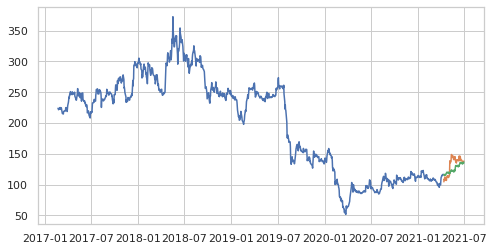

In [ ]:
from pmdarima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:MID]
valid = data[MID:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#RMS
rms = np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])), 2)))
print('\nRMSE::')
print(rms)

#PLOT
plt.figure(figsize = (8,4))
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])
plt.show()

5. PROPHET FB LIBRARY

In [ ]:
!pip install fbprophet


RMSE::
16.131506099364913


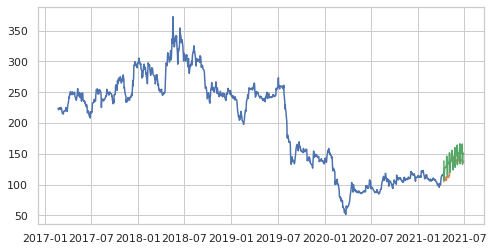

In [ ]:
#importing prophet
from fbprophet import Prophet

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train = new_data[:MID]
valid = new_data[MID:]

#fit the model
model = Prophet(daily_seasonality=True)
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

forecast_valid = forecast['yhat'][MID:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
print('\nRMSE::')
print(rms)

#PLOT
plt.figure(figsize = (8,4))
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values
plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])
plt.show()

6. LSTM (Long Short Term Memory)

Epoch 1/3
Epoch 2/3
Epoch 3/3

RMSE::
6.385644868233328


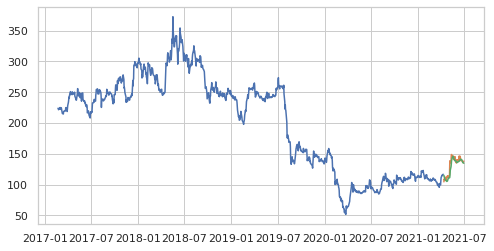

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#print(new_data)

dataset = new_data.values

#print(dataset)

train = dataset[0:MID,:]
valid = dataset[MID:,:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

#print(scaled_data)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
#print(x_train)
#print(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
#print(x_train)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=3, batch_size=1, verbose=3)

inputs = new_data[len(new_data) - len(valid) - 60:].values
#print(inputs)
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

model.save("saved_model.h5")

#RMSE
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print('\nRMSE::')
print(rms)

#PLOT
plt.figure(figsize = (8,4))
train = new_data[:MID]
valid = new_data[MID:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.show()